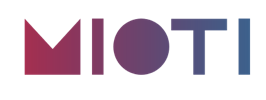
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Computer Vision</center>
<center style="color:#aaa; margin-top:10px;">Prof. Diego García Morate<br>diegogm@faculty.mioti.es</center>


# Challenge S2: Aprendiendo a ver en la oscuridad

## Objetivos

El objetivo de este challenge es procesar las imágenes que obtiene una camera de seguridad noctura. Aplicaremos las técnicas que conocemos de procesamiento de imagen para preprocesar las imagenes de entrada.

## Configuración del entorno

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import data, io, filters
from skimage.color import rgb2gray
from skimage import exposure

import warnings
warnings.filterwarnings("ignore")

In [2]:
def plot_histogram(img):
    from matplotlib import pyplot as plt
    n_dimensiones = len(img.shape)
    if n_dimensiones == 2: # Solo X,Y
        img_int = 255 * img.flatten()    
        plt.hist(img_int, bins = np.arange(256), color="darkgrey")
        plt.title("Gray scale histogram") 
    elif n_dimensiones == 3: # X,Y y Canal
        if img.shape[2] == 3: # R,G,B
            img_r = img[:,:,0].flatten()        
            img_g = img[:,:,1].flatten()
            img_b = img[:,:,2].flatten()
            
            if img.dtype == np.dtype('uint8'):
                plt.hist(img_r, bins = np.arange(256), color = "red") 
                plt.hist(img_g, bins = np.arange(256), color = "green")
                plt.hist(img_b, bins = np.arange(256), color = "blue")
            else:
                plt.hist(img_r, bins = np.arange(1, step=1/255), color = "red") 
                plt.hist(img_g, bins = np.arange(1, step=1/255), color = "green")
                plt.hist(img_b, bins = np.arange(1, step=1/255), color = "blue")

            plt.title("Color histogram") 
    plt.show()

## Flujo de procesamiento

### 1) En este primer paso carga la imagen (`"img/1.jpg"`) en memoria:

In [3]:
img = io.imread("img/1.jpg")

### 2) ¿Qué dimensiones tiene? ¿En qué espacio de color está?

Tiene 2848 píxeles de anchura, 4256 de altura y 3 canales (RGB).

In [4]:
print(img.shape)

(2848, 4256, 3)


### 3) Muestra la imagen en pantalla:

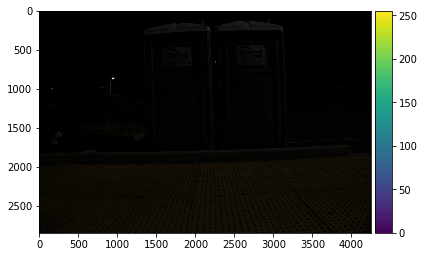

In [5]:
io.imshow(img)
io.show()

### 4) ¿Qué se ve en la imagen?

Es una imagen muy oscura. Se puede apreciar una farola o alguna iluminación y como dos contenedores o baños en una acera.

### 5) Dibuja el histograma y describe la imagen mediante el histograma.

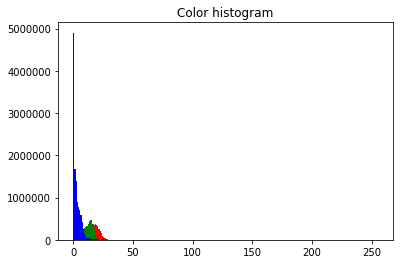

In [6]:
plot_histogram(img)

Podemos observar que todas las componentes se encuentran en el rango del negro; lo cual se corresponde bastante con la imagen mostrada anteriormente, ya que era bastante oscura.

### 6) ¿Se te ocurre alguna manera de mejorar la imagen?

Realizar una ecualización del histograma ya que hará que los cambios de iluminación y contraste se vean reducidos.

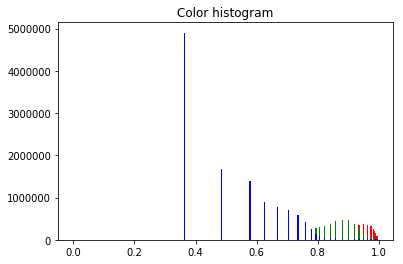

In [7]:
img_equalized = exposure.equalize_hist(img)
io.imshow(img_equalized)
io.show()
plot_histogram(img_equalized)

### 7) ¿Puedes describir el histograma de la imagen resultante?

- La información se ha repartido en todo el rango visual.
- Hay información que antes no veíamos y que es más sencillo de visualizar.
- Predomina el azul.

### 8) Obten la imagen de bordes 

In [8]:
from skimage.color import rgb2gray

img_gray = rgb2gray(img_equalized)
io.imshow(img_gray)
io.show()

In [9]:
#extraemos los bordes

from skimage.filters import sobel

edge = sobel(img_gray)
io.imshow(edge)
io.show()

### 9) ¿Se te ocurre alguna manera de mejorarlo?

Ecualizando los bordes.

In [10]:
border = exposure.equalize_hist(edge)
io.imshow(border)
io.show()

Al ecualizarlos nos da mucha información sobre los bordes, los que podría significar que hay mucho ruido en la imagen, por lo que antes de ecualizar debemos realizar un filtro de mediana.

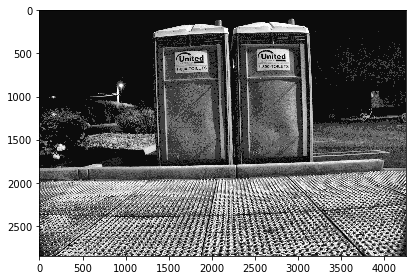

In [11]:
#ecualizamos
border_equalizer = exposure.equalize_adapthist(img_gray, clip_limit=0.05)
io.imshow(border_equalizer)
io.show()

In [12]:
#realizamos el filtro de mediana

from skimage.filters import median
from skimage.morphology import disk


img_median = median(border_equalizer, disk(15))
io.imshow(img_median)
io.show()

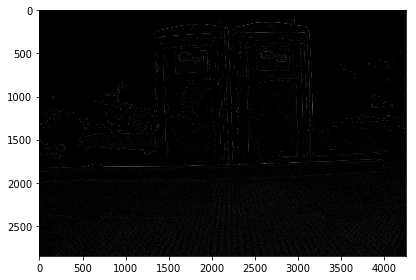

In [13]:
#extraemos los bordes

from skimage.filters import sobel

edge = sobel(img_median)
io.imshow(edge)
io.show()

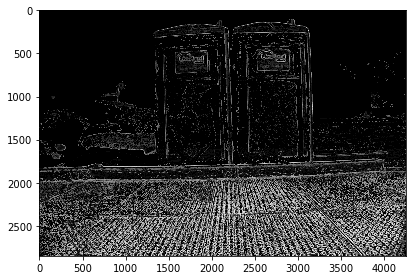

In [14]:
#por ultimo, ecualizamos los bordes para sacarlos más claros.
border = exposure.equalize_adapthist(edge, clip_limit=0.05)
io.imshow(border)
io.show()

### 10) ¿Podrías describir un pipeline típico de trabajo?. Con lo que ya sabes reordena los pasos anteriores y describe como obtendrías una buena imagen de bordes.

1. Cargar la imagen.
2. Aplicación de un filtro de mediana para reducir el ruido de la imagen.
3. Ecualización de la imagen.
4. Obtención de los bordes.
5. Ecualización de los bordes.